In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
import cv2
import os

filenames=[
    'ANC-499-01',
    'ANC-499-02',
    'PAS-11-01',
    'PAS-11-02',
    'LOR-30-01',
    'LOR-30-02',
    'CUZ-241-01',
    'CUZ-241-02',
    'MDIOS-49-01',
    'MDIOS-49-02',
    'ANC-399-03',
    'ANC-399-04',
    'AMAZ-46-03',
    'AMAZ-46-04',
    'HVCA-1-03',
    'HVCA-1-04',
    'LBQUE-14-03',
    'LBQUE-14-04',
    'CR-MOROCHO-3-03',
    'CR-MOROCHO-3-04',
    'APUC-272-03',
    'APUC-272-04',
    'HCO-188-03',
    'HCO-188-04',
    'LIB-105-01',
    'LIB-105-02',
    'LIB-175-01',
    'LIB-175-02',
    'AYAC-05-01',
    'AYAC-05-02',
    'AMAZ-46-01',
    'AMAZ-46-02',
    'SMTIN-62-01',
    'SMTIN-62-02',
    'LOR-23-01',
    'LOR-23-02',
    'HVCA-1-01',
    'HVCA-1-02',
    'LIB-54-01',
    'LIB-54-02',
    'CRMOROCHO-III-01',
    'CRMOROCHO-III-02',
    'HCO-188-01',
    'HCO-188-02',
    'APUC-272-01',
    'APUC-272-02',
    'UCAY-7-01',
    'UCAY-7-02',
    'ANC-399-1',
    'ANC-399-2',
    'ANC-526-1',
    'ANC-526-2',
    'APUC-264-1',
    'APUC-264-2',
    'AREQ-155-1',
    'AREQ-155-2',
    'AYAC-118-1',
    'AYAC-118-2',
    'CAJ-63-1',
    'CAJ-63-2',
    'CAJA-54-1',
    'CAJA-54-2',
    'JUN-220-1',
    'JUN-220-2',##
    'LBQUE-14',
    'LIM-102-1',
    'LIM-102-2',
    'PUN-16-1',
    'PUN-16-2',
    'SMTI-131-1',
    'SMTI-131-2',
    'UCAY-21'
]

#row_column= [[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[6,9],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[6,9]]
row_column= [[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[6,9],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[6,9]]
# row_column= [[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5],[5,5]] 
long_onda = [395.62, 397.6728, 399.7256, 401.7784, 403.8312, 405.884, 407.9368, 409.9896, 412.0424, 414.0952, 416.148, 418.2008, 420.2536, 422.3064, 424.3592, 426.412, 428.4648, 430.5176, 432.5704, 434.6232, 436.676, 438.7288, 440.7816, 442.8344, 444.8872, 446.94, 448.9928, 451.0456, 453.0984, 455.1512, 457.204, 459.2568, 461.3096, 463.3624, 465.4152, 467.468, 469.5208, 471.5736, 473.6264, 475.6792, 477.732, 479.7848, 481.8376, 483.8904, 485.9432, 487.996, 490.0488, 492.1016, 494.1544, 496.2072, 498.26, 500.3128, 502.3656, 504.4184, 506.4712, 508.524, 510.5768, 512.6296, 514.6824, 516.7352, 518.788, 520.8408, 522.8936, 524.9464, 526.9992, 529.052, 531.1048, 533.1576, 535.2104, 537.2632, 539.316, 541.3688, 543.4216, 545.4744, 547.5272, 549.58, 551.6328, 553.6856, 555.7384, 557.7912, 559.844, 561.8968, 563.9496, 566.0024, 568.0552, 570.108, 572.1608, 574.2136, 576.2664, 578.3192, 580.372, 582.4248, 584.4776, 586.5304, 588.5832, 590.636, 592.6888, 594.7416, 596.7944, 598.8472, 600.9, 602.9528, 605.0056, 607.0584, 609.1112, 611.164, 613.2168, 615.2696, 617.3224, 619.3752, 621.428, 623.4808, 625.5336, 627.5864, 629.6392, 631.692, 633.7448, 635.7976, 637.8504, 639.9032, 641.956, 644.0088, 646.0616, 648.1144, 650.1672, 652.22, 654.2728, 656.3256, 658.3784, 660.4312, 662.484, 664.5368, 666.5896, 668.6424, 670.6952, 672.748, 674.8008, 676.8536, 678.9064, 680.9592, 683.012, 685.0648, 687.1176, 689.1704, 691.2232, 693.276, 695.3288, 697.3816, 699.4344, 701.4872, 703.54, 705.5928, 707.6456, 709.6984, 711.7512, 713.804, 715.8568, 717.9096, 719.9624, 722.0152, 724.068, 726.1208, 728.1736, 730.2264, 732.2792, 734.332, 736.3848, 738.4376, 740.4904, 742.5432, 744.596, 746.6488, 748.7016, 750.7544, 752.8072, 754.86, 756.9128, 758.9656, 761.0184, 763.0712, 765.124, 767.1768, 769.2296, 771.2824, 773.3352, 775.388, 777.4408, 779.4936, 781.5464, 783.5992, 785.652, 787.7048, 789.7576, 791.8104, 793.8632, 795.916, 797.9688, 800.0216, 802.0744, 804.1272, 806.18, 808.2328, 810.2856, 812.3384, 814.3912, 816.444, 818.4968, 820.5496, 822.6024, 824.6552, 826.708, 828.7608, 830.8136, 832.8664, 834.9192, 836.972, 839.0248, 841.0776, 843.1304, 845.1832, 847.236, 849.2888, 851.3416, 853.3944, 855.4472, 857.5, 859.5528, 861.6056, 863.6584, 865.7112, 867.764, 869.8168, 871.8696, 873.9224, 875.9752, 878.028, 880.0808, 882.1336, 884.1864, 886.2392]
path = 'C:/Users/PC_01/ProyectoMaiz_v2/all_images/'



In [2]:
def show_image_rgb(filename,plot=True):
    frame_BGR = cv2.imread(path+filename+'-RGB.tif')
    frame_RGB = cv2.cvtColor(frame_BGR, cv2.COLOR_BGR2RGB)

    if plot==True:
        plt.figure(1)
        plt.title("Archivo: " + filename)
        plt.imshow(frame_RGB)
        plt.show(block=False)

    return frame_RGB

In [3]:
# show_image_rgb('LBQUE-14')

In [4]:
def seed_detection(frame_RGB, plot=True, num_seeds=25):

    frame_HSV = cv2.cvtColor(frame_RGB, cv2.COLOR_BGR2HSV)
    V = int(frame_HSV[:, :, 2].mean())
    #print(frame_HSV[:, :, 2].mean())
    #print(frame_HSV[:, :, 2].std())
    v=0
    j=1
    counter = 0
       
    while counter < num_seeds:
        centro_x = []
        centro_y = []
        ancho = []
        largo = []
        angulo = []
        counter = 0
            
        lower = np.array([0, 0, 25], np.uint8)
        upper = np.array([255, 255, 255], np.uint8)
        mask = cv2.inRange(frame_HSV, lower, upper)
        mask = cv2.erode(mask, None, iterations=j) # start 2
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

        frame_detection = frame_RGB.copy()

        if len(cnts) > 0:
            for i in range(len(cnts)):
                (center_x, center_y), (width, height), angle = cv2.minAreaRect(cnts[i])
                if width > 20.0 and height > 20.0:
                    min_rect = np.intp(cv2.boxPoints(((center_x, center_y), (width, height), angle)))
                    cv2.drawContours(frame_detection, [min_rect], 0, (0, 255, 0), 2)
                    centro_x.append(center_x)
                    centro_y.append(center_y)
                    ancho.append(width)
                    largo.append(height)
                    angulo.append(angle)
                    counter = counter + 1
        v = v  + 1
        j = j + 1

    
    mask_2 = mask.copy()
    mask_2 = cv2.erode(mask_2, None, iterations=2)
    gauss = cv2.GaussianBlur(mask_2, (5, 5), 0)
    canny = cv2.Canny(gauss, 80, 10)
    (contornos, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    frame_RGB_segmentation=frame_RGB.copy()
    counter_seg = 0
    contornos_2=[]
    if len(cnts) > 0:
        for i in range(len(cnts)):
            area = cv2.contourArea(cnts[i])
            if area > 20:
                contornos_2.append(cnts[i])
                counter_seg = counter_seg + 1
    cv2.drawContours(frame_RGB_segmentation, contornos_2, -1, (255, 0, 0), 1)

    if plot == True:
        plt.figure(2)
        plt.title("Mask of Seed detection")
        plt.imshow(mask)
        plt.show(block=False)
        plt.figure(3)
        plt.title("Seed detection:" + str(counter))
        plt.imshow(frame_detection)
        plt.show(block=False)
        plt.figure(4)
        plt.title("Segmentation:" + str(counter))
        plt.imshow(frame_RGB_segmentation)
        plt.show(block=False)


    return mask,centro_x, centro_y, ancho, largo, angulo, counter


In [5]:
def give_me_the_spreed(row,column,centro_x,centro_y,spreed):
    centro=np.zeros(shape=[len(centro_y),2])
    centro[:,0]=centro_y
    centro[:,1]=centro_x
    centro_sort=np.zeros(shape=[len(centro_y),2])
    centro_sort[:,0]=np.sort(centro[:,0])
    for j in range(len(centro_y)):
        for i in range(len(centro_y)):
            if centro_sort[j,0] == centro[i,0]:
                centro_sort[j,1]=centro[i,1]
                centro=np.delete(centro,i,0)
                break
    centro_sort_2=np.zeros(shape=[column,2])
    centro_sort_3=np.zeros(shape=[row*column,2])

    for k in range(row):
        centro_sort_2[:,1]=np.sort(centro_sort[0:column,1])
        for j in range(column):
            for i in range(column):
                if centro_sort_2[j,1] == centro_sort[i,1]:
                    centro_sort_2[j,0]=centro_sort[i,0]
                    centro_sort=np.delete(centro_sort,i,0)
                    break
        centro_sort_3[column*k:column*(k+1),:]=centro_sort_2
    centro=np.zeros(shape=[len(centro_y),2])
    centro[:,0]=centro_y
    centro[:,1]=centro_x
    maiz_id=np.zeros(shape=[len(centro_y)])

    for j in range(len(centro_y)):
        for i in range(len(centro_y)):
            if (centro_sort_3[j, 0] == centro[i, 0]) and (centro_sort_3[j, 1] == centro[i, 1]):
                maiz_id[j] = i
                break
    return(int(maiz_id[spreed]))


In [6]:
def black_white():
    dataset_white = rasterio.open(path+'white.bil')
    white_bands = dataset_white.read()
    dataset_white.close()
    dataset_black = rasterio.open(path+'black-cap.bil')
    black_bands = dataset_black.read()
    dataset_black.close()
    return white_bands,black_bands

def hyperspectral_images_seeds(filename,correction=False,white_bands=None,black_bands=None):
    dataset = rasterio.open(path+filename+'.bil')
    frame_bands = dataset.read()
    dataset.close()
    if correction==True:
        #white_bands = np.append(white_bands, white_bands[:,0:frame_bands.shape[1]-white_bands.shape[1],:], axis=1)
        #black_bands = np.append(black_bands, black_bands[:,0:frame_bands.shape[1]-black_bands.shape[1],:], axis=1)
        #frame_bands_correc=(frame_bands-black_bands)/(white_bands-black_bands)*100
        mean_spec_white = white_bands.reshape((240,-1)).mean(axis = 1)
        mean_spec_black = black_bands.reshape((240,-1)).mean(axis = 1)
        mean_spec_black = mean_spec_black.reshape(mean_spec_black.shape[0],1,1)
        mean_spec_white = mean_spec_white.reshape(mean_spec_white.shape[0],1,1)
        hsi_corrected_image = (frame_bands - mean_spec_black) / (mean_spec_white - mean_spec_black)
        #frame_bands_correc=(frame_bands-black_bands)/(white_bands-black_bands)
        return hsi_corrected_image
    else:
        return frame_bands

def one_seed(row_column,mask,frame_RGB,frame_bands,centro_x,centro_y,ancho,largo,angulo,id,plot=True):
    row=row_column[0]
    column=row_column[1]
    maiz_id=give_me_the_spreed(row,column,centro_x,centro_y,id-1)

    ancho_x = int(ancho[maiz_id] * 1.5)
    largo_y = int(largo[maiz_id] * 1.5)

    X_centro_image = frame_RGB.shape[1] / 2
    Y_centro_image = frame_RGB.shape[0] / 2
    X_centro = X_centro_image - centro_x[maiz_id]
    Y_centro = Y_centro_image - centro_y[maiz_id]
    traslate_matrix = np.float32([[1, 0, X_centro], [0, 1, Y_centro]])
    rotate_matrix = cv2.getRotationMatrix2D(center=(X_centro_image, Y_centro_image), angle=angulo[maiz_id], scale=1)

    traslated_frame_rgb = cv2.warpAffine(src=frame_RGB, M=traslate_matrix,
                                         dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
    traslated_mask = cv2.warpAffine(src=mask, M=traslate_matrix, dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))

    rotated_frame_rgb = cv2.warpAffine(src=traslated_frame_rgb, M=rotate_matrix,
                                       dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
    rotated_mask_rgb = cv2.warpAffine(src=traslated_mask, M=rotate_matrix, dsize=(mask.shape[1], mask.shape[0]))

    x_low = int(X_centro_image - ancho_x / 2)
    x_up = int(X_centro_image + ancho_x / 2)
    y_low = int(Y_centro_image - largo_y / 2)
    y_up = int(Y_centro_image + largo_y / 2)

    mini_frame_rgb = rotated_frame_rgb[y_low:y_up, x_low:x_up, :]
    mini_mask = rotated_mask_rgb[y_low:y_up, x_low:x_up]

    mini_mask = cv2.dilate(mini_mask, None, iterations=1)
    mini_mask_0 = cv2.GaussianBlur(mini_mask, (1, 1), 0)

    m = 0

    while True:
        m = m + 1
        mini_mask = mini_mask_0.copy()
        mini_mask = cv2.erode(mini_mask,None, iterations=2)
        mini_mask = cv2.dilate(mini_mask, None, iterations=m)
        mini_mask = cv2.GaussianBlur(mini_mask, (1, 1), 0)

        mini_frame_rgb_seg_obs = mini_frame_rgb.copy()

        (contornos, _) = cv2.findContours(mini_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        area_max = 0
        n = 0
        if len(contornos) > 0:
            for i in range(len(contornos)):
                area = cv2.contourArea(contornos[i])
                if area > 800:
                    if area_max < area:
                        area_max = area
                        n = int(i)
                        print(id, area_max)
            if area_max > 800:
                break

    mini_mask_2 = np.zeros((mini_frame_rgb.shape[0], mini_frame_rgb.shape[1]), 'uint8')
    cv2.drawContours(mini_mask_2, [contornos[n]], -1, 255, -1)
    mini_mask_2 = cv2.erode(mini_mask_2, None, iterations=3)
    mini_mask_2 = cv2.dilate(mini_mask_2, None, iterations=3)
    mini_frame_rgb_seg=cv2.bitwise_and(mini_frame_rgb, mini_frame_rgb, mask=mini_mask_2)

    x = np.array(long_onda)
    y_mean = np.zeros(x.shape)
    y_std = np.zeros(x.shape)
    for i in range(len(x)):
        traslated_frame_band = cv2.warpAffine(src=frame_bands[i, :, :], M=traslate_matrix,dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
        rotated_frame_band = cv2.warpAffine(src=traslated_frame_band, M=rotate_matrix,dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
        mini_frame_band = rotated_frame_band[y_low:y_up, x_low:x_up]
        mini_frame_band_seg = cv2.bitwise_and(mini_frame_band, mini_frame_band, mask=mini_mask_2)

        vector = []
        for n in mini_frame_band_seg.reshape(-1):
            if n != 0:
                vector.append(n)
        y_mean[i] = np.mean(vector)
        y_std[i] = np.std(vector)

    if plot == True:
        fig, axs = plt.subplots(1, 3, figsize=(10, 6))
        axs[0].imshow(mini_frame_rgb_seg)
        axs[0].set_title("Imagen rgb de la semilla: " + str(id))
        axs[1].imshow(mini_mask_2)
        axs[1].set_title("Mascara de la semilla: " + str(id))
        axs[2].plot(x, y_mean, label="mean")
        axs[2].plot(x, y_std, label="std")
        axs[2].legend()
        axs[2].twinx().set_ylabel("desviacion estandar")
        axs[2].set_xlabel('Espectro')
        axs[2].set_ylabel('media aritmetica')
        axs[2].set_title("Longitud de onda vs mean")
        plt.show(block=True)
    return y_mean,y_std


In [7]:
def several_seeds(row_column,mask,frame_RGB,frame_bands,centro_x,centro_y,ancho,largo,angulo,plot=True):
    row=row_column[0]
    column=row_column[1]
    maiz_id=give_me_the_spreed(row,column,centro_x,centro_y,id-1)
  

    ancho_x = int(ancho[maiz_id] * 1.5)
    largo_y = int(largo[maiz_id] * 1.5)

    X_centro_image = frame_RGB.shape[1] / 2
    Y_centro_image = frame_RGB.shape[0] / 2
    X_centro = X_centro_image - centro_x[maiz_id]
    Y_centro = Y_centro_image - centro_y[maiz_id]
    traslate_matrix = np.float32([[1, 0, X_centro], [0, 1, Y_centro]])
    rotate_matrix = cv2.getRotationMatrix2D(center=(X_centro_image, Y_centro_image), angle=angulo[maiz_id], scale=1)

    traslated_frame_rgb = cv2.warpAffine(src=frame_RGB, M=traslate_matrix,
                                         dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
    traslated_mask = cv2.warpAffine(src=mask, M=traslate_matrix, dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))

    rotated_frame_rgb = cv2.warpAffine(src=traslated_frame_rgb, M=rotate_matrix,
                                       dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
    rotated_mask_rgb = cv2.warpAffine(src=traslated_mask, M=rotate_matrix, dsize=(mask.shape[1], mask.shape[0]))

    x_low = int(X_centro_image - ancho_x / 2)
    x_up = int(X_centro_image + ancho_x / 2)
    y_low = int(Y_centro_image - largo_y / 2)
    y_up = int(Y_centro_image + largo_y / 2)

    mini_frame_rgb = rotated_frame_rgb[y_low:y_up, x_low:x_up, :]
    mini_mask = rotated_mask_rgb[y_low:y_up, x_low:x_up]

    mini_mask = cv2.dilate(mini_mask, None, iterations=1)
    mini_mask = cv2.GaussianBlur(mini_mask, (1, 1), 0)

    mini_frame_rgb_seg_obs = mini_frame_rgb.copy()

    canny = cv2.Canny(mini_mask, 80, 10)
    (contornos, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_2 = []
    area_max = 0
    if len(contornos) > 0:
        for i in range(len(contornos)):
            area = cv2.contourArea(contornos[i])
            if area > 20:
                if area_max < area:
                    area_max = area

                contornos_2.append(contornos[i])

    mini_mask_2 = np.zeros((mini_frame_rgb.shape[0], mini_frame_rgb.shape[1]), 'uint8')
    cv2.drawContours(mini_mask_2, contornos_2, -1, 255, -1)
    mini_mask_2 = cv2.erode(mini_mask_2, None, iterations=3)
    mini_mask_2 = cv2.dilate(mini_mask_2, None, iterations=3)
    mini_frame_rgb_seg=cv2.bitwise_and(mini_frame_rgb, mini_frame_rgb, mask=mini_mask_2)


    plt.figure(5)
    plt.imshow(mini_mask_2)
    plt.title("Imagen rgb de la semilla: " + str(id))
    plt.show(block=True)
    plt.show()


    x = np.array(long_onda)
    y_mean = np.zeros(x.shape)
    y_std = np.zeros(x.shape)
    for i in range(len(x)):
        traslated_frame_band = cv2.warpAffine(src=frame_bands[i, :, :], M=traslate_matrix,dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
        rotated_frame_band = cv2.warpAffine(src=traslated_frame_band, M=rotate_matrix,dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
        mini_frame_band = rotated_frame_band[y_low:y_up, x_low:x_up]
        mini_frame_band_seg = cv2.bitwise_and(mini_frame_band, mini_frame_band, mask=mini_mask_2)

        vector = []
        for n in mini_frame_band_seg.reshape(-1):
            if n != 0:
                vector.append(n)
        y_mean[i] = np.mean(vector)
        y_std[i] = np.std(vector)

    if plot == True:
        fig, axs = plt.subplots(1, 3, figsize=(10, 6))
        axs[0].imshow(mini_frame_rgb_seg)
        axs[0].set_title("Imagen rgb de la semilla: " + str(id))
        axs[1].imshow(mini_mask_2)
        axs[1].set_title("Mascara de la semilla: " + str(id))
        axs[2].plot(x, y_mean, label="mean")
        axs[2].plot(x, y_std, label="std")
        axs[2].legend()
        axs[2].twinx().set_ylabel("desviacion estandar")
        axs[2].set_xlabel('Espectro')
        axs[2].set_ylabel('media aritmetica')
        axs[2].set_title("Longitud de onda vs mean")
        plt.show(block=True)
    return y_mean,y_std


In [8]:
def seeds(row_column,mask,frame_RGB,centro_x,centro_y,ancho,largo,angulo,plot=True):
    row=row_column[0]
    column=row_column[1]
    OBS = []
    MASK = []
    for id in range(len(centro_x)):
        maiz_id=give_me_the_spreed(row,column,centro_x,centro_y,id)
        ancho_x = int(ancho[maiz_id]*1.5)
        largo_y = int(largo[maiz_id]*1.5)

        X_centro_image = frame_RGB.shape[1]/2
        Y_centro_image = frame_RGB.shape[0]/2
        X_centro= X_centro_image-centro_x[maiz_id]
        Y_centro= Y_centro_image-centro_y[maiz_id]
        traslate_matrix = np.float32([[1, 0, X_centro], [0, 1, Y_centro]])
        rotate_matrix = cv2.getRotationMatrix2D(center=(X_centro_image, Y_centro_image), angle=angulo[maiz_id],scale=1)


        traslated_frame_rgb = cv2.warpAffine(src=frame_RGB, M=traslate_matrix, dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
        traslated_mask = cv2.warpAffine(src=mask, M=traslate_matrix, dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))

        rotated_frame_rgb = cv2.warpAffine(src=traslated_frame_rgb, M=rotate_matrix, dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
        rotated_mask_rgb = cv2.warpAffine(src=traslated_mask, M=rotate_matrix, dsize=(mask.shape[1], mask.shape[0]))

        x_low = int(X_centro_image - ancho_x/ 2)
        x_up = int(X_centro_image + ancho_x/ 2)
        y_low = int(Y_centro_image - largo_y / 2)
        y_up = int(Y_centro_image + largo_y / 2)

        mini_frame_rgb = rotated_frame_rgb[y_low:y_up, x_low:x_up, :]
        mini_mask_0 = rotated_mask_rgb[y_low:y_up, x_low:x_up]

        m= 0

        while True:
            m = m + 1

            mini_mask= mini_mask_0.copy()
            mini_mask = cv2.erode(mini_mask,None, iterations=2)
            mini_mask = cv2.dilate(mini_mask, None, iterations=m)
            mini_mask = cv2.GaussianBlur(mini_mask, (1, 1), 0)
            
            mini_frame_rgb_seg_obs=mini_frame_rgb.copy()
            (contornos, _) = cv2.findContours(mini_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            area_max=0
            n=0

            
            if len(contornos) > 0:
                for i in range(len(contornos)):
                    area = cv2.contourArea(contornos[i])
#                     print(f"Area for: {area}")
                    if area > 800:
                        if area_max < area:
                            area_max = area
                            n=int(i)
                            print(id,area_max)
                if area_max > 800:
                    break

        cv2.drawContours(mini_frame_rgb_seg_obs, [contornos[n]], -1, (0, 0, 255), 1)
     
    
        mini_mask_2 = np.zeros((mini_frame_rgb.shape[0], mini_frame_rgb.shape[1]), 'uint8')
        cv2.drawContours(mini_mask_2, [contornos[n]],-1, 255, -1)
        mini_mask_2 = cv2.erode(mini_mask_2, None, iterations=3)
        mini_mask_2 = cv2.dilate(mini_mask_2, None, iterations=3)

        OBS.append(mini_frame_rgb_seg_obs)
        MASK.append( mini_mask_2)


    if plot == True:
        plt.figure(5)
        for j in range(0, row):
            for i in range(0, column):
                plt.subplot(column, column, j * column + i + 1)
                #plt.title('%d/%d' % (Y_test_2[j * 10 + i + 1 + idx], Y_predict_2[j * 10 + i + 1 + idx]))
                plt.imshow(OBS[j * column + i ])
        plt.show(block=False)

        plt.figure(6)
        for j in range(0, row):
            for i in range(0, column):
                plt.subplot(column, column, j * column + i + 1)
                # plt.title('%d/%d' % (Y_test_2[j * 10 + i + 1 + idx], Y_predict_2[j * 10 + i + 1 + idx]))
                plt.imshow(MASK[j * column + i])
        plt.show(block=True)
    return

# def analize_one_seed(filename,id_seed):
#     group_of_seeds=filenames.index(filename)
#     frame_RGB = show_image_rgb(filename)
#     mask,centro_x, centro_y, ancho, largo, angulo, counter = seed_detection(frame_RGB,plot=False)
#     white_bands,black_bands = black_white()
#     frame_bands_correc = hyperspectral_images_seeds(filename,correction=True,white_bands=white_bands,black_bands=black_bands)
#     one_seed(row_column[group_of_seeds], mask, frame_RGB, frame_bands_correc, centro_x, centro_y, ancho, largo, angulo,id_seed)
#     return

def analize_all_seeds(filename):
    group_of_seeds=filenames.index(filename)
    frame_RGB = show_image_rgb(filename)
    mask,centro_x, centro_y, ancho, largo, angulo, counter = seed_detection(frame_RGB)
    white_bands,black_bands = black_white()
    frame_bands_correc = hyperspectral_images_seeds(filename,correction=True,white_bands=white_bands,black_bands=black_bands)
    several_seeds(row_column[group_of_seeds], mask, frame_RGB, frame_bands_correc, centro_x, centro_y, ancho, largo, angulo)
    return

def view_seeds(filename):
    
    group_of_seeds=filenames.index(filename)
    
    frame_RGB = show_image_rgb(filename)
    
    num_seeds = row_column[group_of_seeds][0]*row_column[group_of_seeds][1]
    
    mask,centro_x, centro_y, ancho, largo, angulo, counter = seed_detection(frame_RGB,num_seeds=num_seeds)
    
    seeds(row_column[group_of_seeds], mask, frame_RGB, centro_x, centro_y, ancho, largo, angulo)
    
    return

def generate_images_bands(name):

    white_bands, black_bands = black_white()
    os.mkdir("images_hyper_2/"+name)
    frame_RGB = show_image_rgb(name,plot=False)
    plt.title("Archivo: " + name)
    plt.imshow(frame_RGB)
    plt.savefig("images_hyper_2/"+name+"/RGB.jpg")
    frame_bands_correc = hyperspectral_images_seeds(filenames[0], correction=True, white_bands=white_bands,black_bands=black_bands)
    for i in range(len(long_onda)):
        plt.figure(figsize=(10, 6))
        im = plt.imshow(frame_bands_correc[i], vmin=0, vmax=frame_bands_correc[i].max(), cmap='viridis')
        plt.title("Longitud de onda: " + str(long_onda[i]) + "nm" + " Max Relativo: " + str(frame_bands_correc[i].max()) + "%")
        plt.colorbar(im)
        plt.savefig("images_hyper/"+name + "/" + str(long_onda[i]) + ".jpg")

    return

def extracting_features(filename,white_bands, black_bands):
    
    group_of_seeds = filenames.index(filename)
    
    features = []
    
    for nm in long_onda:
        features.append("mean_" + str(nm) + "_nm")
    
    for nm in long_onda:
        features.append("std_" + str(nm) + "_nm")
    
    keys = ['name', 'seed'] + features
    
    df=pd.DataFrame(columns=keys)
    
    frame_RGB = show_image_rgb(filename,plot=False)
    
    num_seeds = row_column[group_of_seeds][0]*row_column[group_of_seeds][1]
    
    mask,centro_x, centro_y, ancho, largo, angulo, counter = seed_detection(frame_RGB,plot=False, num_seeds=num_seeds)
    
    frame_bands_correc = hyperspectral_images_seeds(filename, correction=True, white_bands=white_bands,black_bands=black_bands)
    
    for id_seed in range(counter):
        y_mean,y_std=one_seed(row_column[group_of_seeds], mask, frame_RGB, frame_bands_correc, centro_x, centro_y, ancho, largo, angulo,id_seed+1,plot=False)
        values=[filename]+[id_seed+1]+y_mean.tolist()+y_std.tolist()
        df=pd.concat([df, pd.DataFrame(dict(zip(keys, values)),index=[0])], ignore_index=True)
    return df

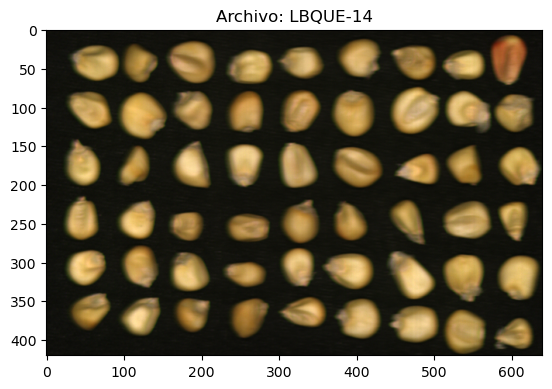

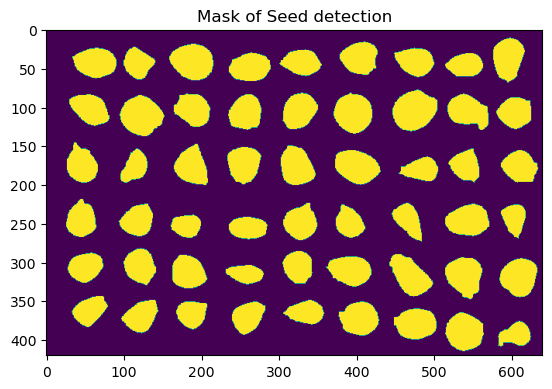

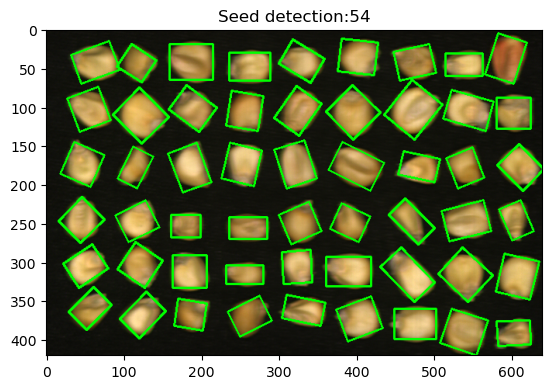

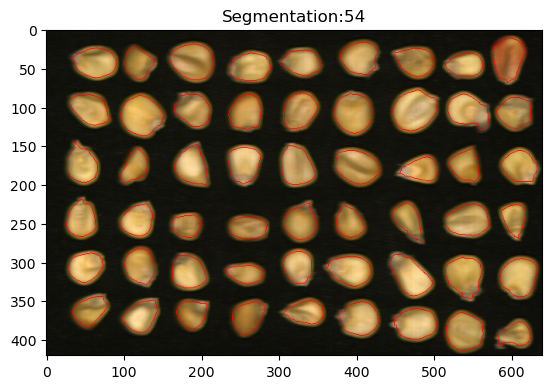

0 1567.5
1 1058.5
2 1746.0
3 1336.5
4 1195.0
5 1488.0
6 1296.0
7 964.5
8 1599.0
9 1392.5
10 1993.5
11 1375.0
12 1430.5
13 1493.5
14 1842.0
15 2173.5
16 1600.0
17 1167.0
18 1354.5
19 932.0
20 1474.5
21 1494.0
22 1622.5
23 1813.5
24 1010.5
25 1087.0
26 1294.0
27 1254.5
28 1244.5
29 874.0
30 958.5
31 1363.5
32 1040.0
33 1046.0
34 1703.5
35 858.5
36 1234.0
37 1327.0
38 1276.0
39 815.5
40 1185.0
41 1408.5
42 1731.0
43 1753.5
44 1731.0
45 1121.5
46 1258.5
47 1006.0
48 1123.5
49 1058.5
50 1600.0
51 1515.0
52 1774.0
53 874.5


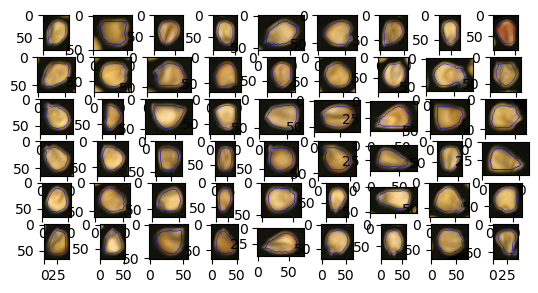

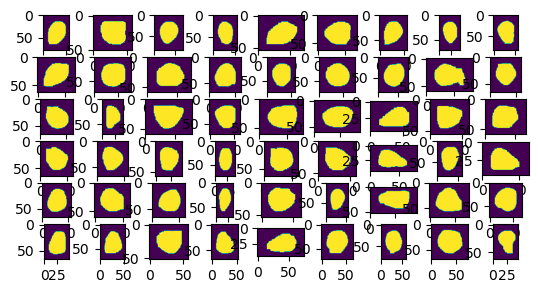

In [9]:
name = view_seeds(filenames[64])

In [29]:
white_bands, black_bands = black_white()
for name in filenames[65:]:
    df=extracting_features(name,white_bands, black_bands)
    df.to_csv('csv_features/features_'+name+'.csv')
    print(df.head())



C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 4022.0
2 3388.5
3 2698.5
4 3119.5
5 4378.0
6 3209.0
7 3924.0
8 3941.0
9 2720.5
10 2804.0
11 2746.5
12 3554.5
13 3097.5
14 3621.5
15 3710.0
16 2754.0
17 4503.5
18 4030.5
19 2399.5
20 2940.0
21 3224.5
22 3916.0
23 3289.0
24 3413.5
25 3446.5
        name seed  mean_395.62_nm  mean_397.6728_nm  mean_399.7256_nm  \
0  LIM-102-1    1        0.145343          0.136446          0.130887   
1  LIM-102-1    2        0.155754          0.141724          0.130798   
2  LIM-102-1    3        0.131040          0.116821          0.107783   
3  LIM-102-1    4        0.151600          0.137543          0.125809   
4  LIM-102-1    5        0.152402          0.142192          0.134140   

   mean_401.7784_nm  mean_403.8312_nm  mean_405.884_nm  mean_407.9368_nm  \
0          0.122074          0.119661         0.118817          0.120630   
1          0.120489          0.116474         0.114723          0.114460   
2          0.101978          0.097921         0.096682          0.097078   
3          0.117

C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2833.0
2 2813.5
3 3272.5
4 2887.5
5 4015.5
6 3508.5
7 2894.5
8 3837.5
9 2520.5
10 3600.5
11 3254.5
12 1970.5
13 4271.0
14 3575.5
15 3140.5
16 3586.5
17 2700.5
18 5052.5
19 4345.0
20 3358.0
21 3468.5
22 2674.5
23 2793.0
24 3709.0
25 2350.5
        name seed  mean_395.62_nm  mean_397.6728_nm  mean_399.7256_nm  \
0  LIM-102-2    1        0.126024          0.116589          0.110420   
1  LIM-102-2    2        0.134183          0.123463          0.112224   
2  LIM-102-2    3        0.147907          0.135944          0.125399   
3  LIM-102-2    4        0.120934          0.109016          0.097559   
4  LIM-102-2    5        0.135241          0.126031          0.118844   

   mean_401.7784_nm  mean_403.8312_nm  mean_405.884_nm  mean_407.9368_nm  \
0          0.102623          0.098767         0.095431          0.096449   
1          0.101919          0.096023         0.095171          0.092767   
2          0.119644          0.116296         0.116808          0.117026   
3          0.090

C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2696.5
2 3807.0
3 3556.0
4 3092.5
5 2889.5
6 2919.0
7 3959.5
8 3734.5
9 3312.0
10 2430.0
11 3282.0
12 3862.5
13 4018.0
14 3171.5
15 3466.0
16 3568.0
17 2743.0
18 3749.5
19 3043.5
20 2640.0
21 4161.0
22 4042.0
23 3818.5
24 2830.5
25 3704.0
       name seed  mean_395.62_nm  mean_397.6728_nm  mean_399.7256_nm  \
0  PUN-16-1    1        0.103906          0.091977          0.088529   
1  PUN-16-1    2        0.147086          0.136695          0.130618   
2  PUN-16-1    3        0.176145          0.160845          0.151950   
3  PUN-16-1    4        0.126906          0.114546          0.102954   
4  PUN-16-1    5        0.130237          0.118401          0.109547   

   mean_401.7784_nm  mean_403.8312_nm  mean_405.884_nm  mean_407.9368_nm  \
0          0.084084          0.077721         0.075562          0.073462   
1          0.126226          0.120173         0.117109          0.118475   
2          0.147610          0.142677         0.141859          0.145358   
3          0.091625   

C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 3828.0
2 4410.5
3 3315.0
4 3177.0
5 2749.0
6 3887.5
7 4015.0
8 918.0
8 4783.0
9 3729.0
10 2688.5
11 2777.0
12 2789.5
13 3765.0
14 3264.0
15 2303.0
16 3976.5
17 3128.0
18 3250.5
19 3939.5
20 3167.0
21 3333.5
22 3212.0
23 3513.0
24 3324.0
25 4140.5
       name seed  mean_395.62_nm  mean_397.6728_nm  mean_399.7256_nm  \
0  PUN-16-2    1        0.169169          0.160575          0.152135   
1  PUN-16-2    2        0.157537          0.142939          0.133146   
2  PUN-16-2    3        0.197467          0.184927          0.174463   
3  PUN-16-2    4        0.182475          0.169693          0.158841   
4  PUN-16-2    5        0.118457          0.102910          0.090631   

   mean_401.7784_nm  mean_403.8312_nm  mean_405.884_nm  mean_407.9368_nm  \
0          0.149088          0.145505         0.146616          0.150624   
1          0.124552          0.117363         0.110498          0.108759   
2          0.170438          0.164575         0.165761          0.169178   
3          0.1

C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 3143.0
2 1987.5
3 3161.0
4 3343.5
5 2477.0
6 2366.0
7 1636.5
8 2627.5
9 2986.5
10 2464.0
11 2513.0
12 2832.5
13 2329.5
14 2448.0
15 3090.0
16 2098.0
17 1777.0
18 2076.0
19 2442.0
20 2763.5
21 2737.5
22 2261.0
23 1719.5
24 2742.5
25 2527.5
         name seed  mean_395.62_nm  mean_397.6728_nm  mean_399.7256_nm  \
0  SMTI-131-1    1        0.125067          0.107770          0.104184   
1  SMTI-131-1    2        0.127152          0.111524          0.105346   
2  SMTI-131-1    3        0.139495          0.122315          0.114864   
3  SMTI-131-1    4        0.152640          0.141527          0.133910   
4  SMTI-131-1    5        0.132506          0.123993          0.114798   

   mean_401.7784_nm  mean_403.8312_nm  mean_405.884_nm  mean_407.9368_nm  \
0          0.098050          0.093664         0.093997          0.096269   
1          0.101394          0.096057         0.093705          0.094276   
2          0.108015          0.103406         0.099303          0.099670   
3         

C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2464.0
2 2169.5
3 2793.5
4 2148.0
5 2035.0
6 2400.0
7 2759.5
8 1991.5
9 2830.0
10 2726.0
11 2059.0
12 2637.5
13 3171.5
14 2044.0
15 2338.0
16 2469.0
17 2300.5
18 1877.0
19 2666.5
20 2618.0
21 2847.5
22 2565.5
23 3277.5
24 2406.0
25 2325.5
         name seed  mean_395.62_nm  mean_397.6728_nm  mean_399.7256_nm  \
0  SMTI-131-2    1        0.101311          0.091643          0.088273   
1  SMTI-131-2    2        0.098982          0.089636          0.084856   
2  SMTI-131-2    3        0.106672          0.098164          0.092872   
3  SMTI-131-2    4        0.102038          0.092671          0.085973   
4  SMTI-131-2    5        0.115584          0.108467          0.105242   

   mean_401.7784_nm  mean_403.8312_nm  mean_405.884_nm  mean_407.9368_nm  \
0          0.085443          0.080859         0.080801          0.081204   
1          0.083192          0.080030         0.079011          0.080020   
2          0.089798          0.088389         0.085238          0.085083   
3         

C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 1380.5
2 1746.5
3 1500.5
4 1500.0
5 1181.0
6 1779.0
7 1091.0
8 1342.5
9 1589.5
10 835.0
11 2069.0
12 1777.5
13 971.5
14 1774.5
15 1578.0
16 1890.5
17 1164.5
18 1489.5
19 1899.5
20 1835.5
21 2394.5
22 1770.5
23 1829.5
24 1028.5
25 1163.5
26 1528.5
27 1043.0
28 931.0
29 2086.0
30 1275.0
31 863.5
32 1192.0
33 1248.0
34 1100.5
35 984.0
36 1780.0
37 1206.0
38 1533.5
39 2036.0
40 2140.5
41 1109.5
42 1432.5
43 1702.0
44 1399.0
45 1070.5
46 1076.5
47 1955.0
48 1150.5
49 1815.5
50 1061.5
51 1853.5
52 1555.5
53 1230.5
54 1724.0
      name seed  mean_395.62_nm  mean_397.6728_nm  mean_399.7256_nm  \
0  UCAY-21    1        0.122702          0.106669          0.101768   
1  UCAY-21    2        0.144830          0.133481          0.123878   
2  UCAY-21    3        0.161474          0.148159          0.137357   
3  UCAY-21    4        0.176817          0.158944          0.146772   
4  UCAY-21    5        0.137485          0.122402          0.109077   

   mean_401.7784_nm  mean_403.8312_nm  mean_405

In [11]:
print(len(filenames))

72


In [10]:
def crop_one_seed(row_column,mask,frame_RGB,frame_bands,centro_x,centro_y,ancho,largo,angulo,id,plot=True):
    row=row_column[0]
    column=row_column[1]
    maiz_id=give_me_the_spreed(row,column,centro_x,centro_y,id-1)
    ancho_x = int(ancho[maiz_id]*1.5)
    largo_y = int(largo[maiz_id]*1.5)

    X_centro_image = frame_RGB.shape[1]/2
    Y_centro_image = frame_RGB.shape[0]/2
    X_centro= X_centro_image-centro_x[maiz_id]
    Y_centro= Y_centro_image-centro_y[maiz_id]
    traslate_matrix = np.float32([[1, 0, X_centro], [0, 1, Y_centro]])
    rotate_matrix = cv2.getRotationMatrix2D(center=(X_centro_image, Y_centro_image), angle=angulo[maiz_id],scale=1)


    traslated_frame_rgb = cv2.warpAffine(src=frame_RGB, M=traslate_matrix, dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
    traslated_mask = cv2.warpAffine(src=mask, M=traslate_matrix, dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))

    rotated_frame_rgb = cv2.warpAffine(src=traslated_frame_rgb, M=rotate_matrix, dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
    rotated_mask_rgb = cv2.warpAffine(src=traslated_mask, M=rotate_matrix, dsize=(mask.shape[1], mask.shape[0]))

    x_low = int(X_centro_image - ancho_x/ 2)
    x_up = int(X_centro_image + ancho_x/ 2)
    y_low = int(Y_centro_image - largo_y / 2)
    y_up = int(Y_centro_image + largo_y / 2)

    mini_frame_rgb = rotated_frame_rgb[y_low:y_up, x_low:x_up, :]
    mini_mask_0 = rotated_mask_rgb[y_low:y_up, x_low:x_up]


    m= 0

    while True:
        m = m + 1
        mini_mask= mini_mask_0.copy()
        mini_mask = cv2.erode(mini_mask,None, iterations=2)
        mini_mask = cv2.dilate(mini_mask, None, iterations=m)
        mini_mask = cv2.GaussianBlur(mini_mask, (1, 1), 0)

        mini_frame_rgb_seg_obs=mini_frame_rgb.copy()
        
        (contornos, _) = cv2.findContours(mini_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        area_max=0
        n=0

        if len(contornos) > 0:
            for i in range(len(contornos)):
                area = cv2.contourArea(contornos[i])
                
                if area > 800:
                    if area_max < area:
                        area_max = area
                        n=int(i)
                        print(id,area_max)
            if area_max > 800:
                break


    print(len([contornos[n]]))
    cv2.drawContours(mini_frame_rgb_seg_obs, [contornos[n]], -1, (0, 0, 255), 1)
    
    
    mini_mask_2 = np.zeros((mini_frame_rgb.shape[0], mini_frame_rgb.shape[1]), 'uint8')
    cv2.drawContours(mini_mask_2, [contornos[n]],-1, 255, -1)
    mini_mask_2 = cv2.erode(mini_mask_2, None, iterations=3)
    mini_mask_2 = cv2.dilate(mini_mask_2, None, iterations=3)

    #mini_frame_rgb_seg=cv2.bitwise_and(mini_frame_rgb, mini_frame_rgb, mask=mini_mask_2)

  
    x = np.array(long_onda)

    one_seed_bands = []
    for i in range(len(x)):
        traslated_frame_band = cv2.warpAffine(src=frame_bands[i, :, :], M=traslate_matrix,dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
        rotated_frame_band = cv2.warpAffine(src=traslated_frame_band, M=rotate_matrix,dsize=(frame_RGB.shape[1], frame_RGB.shape[0]))
        mini_frame_band = rotated_frame_band[y_low:y_up, x_low:x_up]
        mini_frame_band_seg = cv2.bitwise_and(mini_frame_band, mini_frame_band, mask=mini_mask_2)

        one_seed_bands.append(mini_frame_band_seg)
    
    one_seed_hci = np.array(one_seed_bands)
    #one_seed_hci = one_seed_hci.transpose(1,2,0)
    return one_seed_hci

def save_hsi(file_path, img_hci):
    with rasterio.open(
    file_path,
    'w',
    driver='ENVI',
    height=img_hci.shape[1],
    width=img_hci.shape[2],
    count=240,
    dtype=img_hci.dtype,
    transform=(1.0, 0.0, 0.0, 0.0, 1.0, 0.0),
    interleave= "BIL"
    ) as dst:
        dst.write(img_hci)


In [11]:
def extraction_seeds_full_spectra(filename,white_bands, black_bands):
    group_of_seeds = filenames.index(filename)
    keys = ['name', 'seed', "file_name"]
    
    df=pd.DataFrame(columns=keys)
    frame_RGB = show_image_rgb(filename,plot=False)
    
    num_seeds = row_column[group_of_seeds][0]*row_column[group_of_seeds][1]
    
    mask,centro_x, centro_y, ancho, largo, angulo, counter = seed_detection(frame_RGB,plot=False, num_seeds=num_seeds)
    print(f"{counter} semillas encontradas:")
    frame_bands_correc = hyperspectral_images_seeds(filename, correction=True, white_bands=white_bands,black_bands=black_bands)
    parent_path_hsi_seeds = "./seeds"
    os.makedirs(parent_path_hsi_seeds, exist_ok= True)
    for id_seed in range(counter):
        one_seed_hci = crop_one_seed(row_column[group_of_seeds], mask, frame_RGB, frame_bands_correc, centro_x, centro_y, ancho, largo, angulo,id_seed+1,plot=False)
        filename_seed = f"{filename}-SEED-{id_seed+1}"
        values=[filename , id_seed+1 , filename_seed]
        df = pd.concat([df, pd.DataFrame([dict(zip(keys, values))])], ignore_index=True)
        file_path_seed_hsi = f"./{parent_path_hsi_seeds}/{filename_seed}.bil" 
        save_hsi(file_path_seed_hsi, one_seed_hci)
    return df

In [12]:
def generate_files_dataset(filenames):
    white_bands, black_bands = black_white()
    path_name_csv = "csv_file_path/"
    for name in filenames:
        df= extraction_seeds_full_spectra(name,white_bands, black_bands)
        df.to_csv(path_name_csv+'labels_'+name+'.csv')
        print(df.head())

    print('Finalizar')



In [13]:
generate_files_dataset(filenames[:])

C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2227.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2280.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1993.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2383.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2349.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2363.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2333.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2366.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2201.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 3037.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2258.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 3151.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2339.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2787.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2216.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2453.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2543.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2320.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2641.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2106.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2365.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2532.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2388.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2838.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2154.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  ANC-499-01    1  ANC-499-01-SEED-1
1  ANC-499-01    2  ANC-499-01-SEED-2
2  ANC-499-01    3  ANC-499-01-SEED-3
3  ANC-499-01    4  ANC-499-01-SEED-4
4  ANC-499-01    5  ANC-499-01-SEED-5
25 semillas encontradas:
1 2355.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1717.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2225.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2229.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2675.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2377.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2162.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1918.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 4011.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2837.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2810.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2149.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2680.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3019.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2647.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2695.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2223.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2192.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2053.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2407.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2912.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2231.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1903.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2345.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2441.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


         name seed          file_name
0  ANC-499-02    1  ANC-499-02-SEED-1
1  ANC-499-02    2  ANC-499-02-SEED-2
2  ANC-499-02    3  ANC-499-02-SEED-3
3  ANC-499-02    4  ANC-499-02-SEED-4
4  ANC-499-02    5  ANC-499-02-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 1956.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1884.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1822.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1575.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1688.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1771.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1593.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1847.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1767.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1394.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1996.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1858.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2184.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1608.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1585.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1787.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1646.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1818.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1746.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1667.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2203.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2197.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1956.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1794.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1745.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  PAS-11-01    1  PAS-11-01-SEED-1
1  PAS-11-01    2  PAS-11-01-SEED-2
2  PAS-11-01    3  PAS-11-01-SEED-3
3  PAS-11-01    4  PAS-11-01-SEED-4
4  PAS-11-01    5  PAS-11-01-SEED-5
25 semillas encontradas:
1 1217.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1647.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2017.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1947.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1759.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1747.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2220.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1780.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1376.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1716.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2041.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2180.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1493.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1331.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1847.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1978.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1271.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1758.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1587.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1532.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1711.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1660.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1248.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1720.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1523.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  PAS-11-02    1  PAS-11-02-SEED-1
1  PAS-11-02    2  PAS-11-02-SEED-2
2  PAS-11-02    3  PAS-11-02-SEED-3
3  PAS-11-02    4  PAS-11-02-SEED-4
4  PAS-11-02    5  PAS-11-02-SEED-5
25 semillas encontradas:
1 2164.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1839.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2085.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1778.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1773.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2070.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1859.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2667.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2150.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1910.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2298.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2058.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2234.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1919.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1726.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1804.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1916.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1880.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1863.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1530.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2283.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1968.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2118.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1801.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2157.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  LOR-30-01    1  LOR-30-01-SEED-1
1  LOR-30-01    2  LOR-30-01-SEED-2
2  LOR-30-01    3  LOR-30-01-SEED-3
3  LOR-30-01    4  LOR-30-01-SEED-4
4  LOR-30-01    5  LOR-30-01-SEED-5
25 semillas encontradas:
1 2006.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2411.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2416.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1481.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1474.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1968.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1771.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1660.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1547.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1721.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1904.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1735.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2073.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1859.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1897.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1598.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1998.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1721.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1603.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1377.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1725.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1459.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1550.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2136.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1662.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  LOR-30-02    1  LOR-30-02-SEED-1
1  LOR-30-02    2  LOR-30-02-SEED-2
2  LOR-30-02    3  LOR-30-02-SEED-3
3  LOR-30-02    4  LOR-30-02-SEED-4
4  LOR-30-02    5  LOR-30-02-SEED-5
25 semillas encontradas:
1 2043.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2369.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1924.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1717.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2574.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2724.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2244.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1991.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1382.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2472.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2382.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1643.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1980.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2057.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2072.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2615.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1868.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2070.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2681.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2714.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1862.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2458.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2772.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2028.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2580.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  CUZ-241-01    1  CUZ-241-01-SEED-1
1  CUZ-241-01    2  CUZ-241-01-SEED-2
2  CUZ-241-01    3  CUZ-241-01-SEED-3
3  CUZ-241-01    4  CUZ-241-01-SEED-4
4  CUZ-241-01    5  CUZ-241-01-SEED-5
25 semillas encontradas:
1 2350.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1473.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 3288.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1618.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2611.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2236.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2312.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1965.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2367.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2330.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2513.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2639.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2417.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1684.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1539.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2153.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2322.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2261.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2216.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2251.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2202.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2356.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1825.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2889.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2239.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  CUZ-241-02    1  CUZ-241-02-SEED-1
1  CUZ-241-02    2  CUZ-241-02-SEED-2
2  CUZ-241-02    3  CUZ-241-02-SEED-3
3  CUZ-241-02    4  CUZ-241-02-SEED-4
4  CUZ-241-02    5  CUZ-241-02-SEED-5
25 semillas encontradas:
1 1844.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1724.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2233.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1960.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1135.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 852.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2467.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2193.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1662.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1593.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2114.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1835.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2027.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1460.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1790.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1275.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1397.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1575.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1636.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2039.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2208.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2089.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2497.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1099.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1230.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


          name seed           file_name
0  MDIOS-49-01    1  MDIOS-49-01-SEED-1
1  MDIOS-49-01    2  MDIOS-49-01-SEED-2
2  MDIOS-49-01    3  MDIOS-49-01-SEED-3
3  MDIOS-49-01    4  MDIOS-49-01-SEED-4
4  MDIOS-49-01    5  MDIOS-49-01-SEED-5
25 semillas encontradas:
1 1746.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1621.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1726.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1937.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1824.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1982.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1751.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1689.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1389.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1356.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1703.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1601.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1728.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1089.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1371.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1748.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1766.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2318.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2182.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1510.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2851.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1504.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1298.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1192.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1781.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


          name seed           file_name
0  MDIOS-49-02    1  MDIOS-49-02-SEED-1
1  MDIOS-49-02    2  MDIOS-49-02-SEED-2
2  MDIOS-49-02    3  MDIOS-49-02-SEED-3
3  MDIOS-49-02    4  MDIOS-49-02-SEED-4
4  MDIOS-49-02    5  MDIOS-49-02-SEED-5
25 semillas encontradas:
1 2170.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1844.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1803.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1847.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1486.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2645.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2383.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1469.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2496.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1792.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2460.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2862.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1889.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2883.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1541.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3498.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2056.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2069.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2746.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2158.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2924.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1929.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2226.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2082.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1345.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  ANC-399-03    1  ANC-399-03-SEED-1
1  ANC-399-03    2  ANC-399-03-SEED-2
2  ANC-399-03    3  ANC-399-03-SEED-3
3  ANC-399-03    4  ANC-399-03-SEED-4
4  ANC-399-03    5  ANC-399-03-SEED-5
25 semillas encontradas:
1 1991.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2191.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2844.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2940.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2809.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1867.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2408.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2914.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2869.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 3367.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2823.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2721.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2329.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2496.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2632.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2444.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2695.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2665.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1710.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2843.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2028.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2033.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1957.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2807.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1954.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  ANC-399-04    1  ANC-399-04-SEED-1
1  ANC-399-04    2  ANC-399-04-SEED-2
2  ANC-399-04    3  ANC-399-04-SEED-3
3  ANC-399-04    4  ANC-399-04-SEED-4
4  ANC-399-04    5  ANC-399-04-SEED-5
25 semillas encontradas:
1 2756.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2991.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1689.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2191.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2407.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2447.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2982.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2261.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1933.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1843.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2773.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2136.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2398.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1908.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2265.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2029.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2306.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2482.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2055.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1841.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2892.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2310.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2160.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2163.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1956.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  AMAZ-46-03    1  AMAZ-46-03-SEED-1
1  AMAZ-46-03    2  AMAZ-46-03-SEED-2
2  AMAZ-46-03    3  AMAZ-46-03-SEED-3
3  AMAZ-46-03    4  AMAZ-46-03-SEED-4
4  AMAZ-46-03    5  AMAZ-46-03-SEED-5
25 semillas encontradas:
1 3380.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1908.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1670.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1999.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1797.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 3100.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2209.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2309.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1764.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1943.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2040.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2225.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2213.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1828.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1644.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2812.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2333.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2590.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2481.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1761.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2171.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2646.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2201.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1927.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1942.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


         name seed          file_name
0  AMAZ-46-04    1  AMAZ-46-04-SEED-1
1  AMAZ-46-04    2  AMAZ-46-04-SEED-2
2  AMAZ-46-04    3  AMAZ-46-04-SEED-3
3  AMAZ-46-04    4  AMAZ-46-04-SEED-4
4  AMAZ-46-04    5  AMAZ-46-04-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2883.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2530.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 3310.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3008.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2379.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 3060.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3263.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2214.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 4037.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2302.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2045.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2439.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2327.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2890.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3268.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3055.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2627.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2585.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3091.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 3301.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2587.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2324.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 3043.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3006.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2907.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


        name seed         file_name
0  HVCA-1-03    1  HVCA-1-03-SEED-1
1  HVCA-1-03    2  HVCA-1-03-SEED-2
2  HVCA-1-03    3  HVCA-1-03-SEED-3
3  HVCA-1-03    4  HVCA-1-03-SEED-4
4  HVCA-1-03    5  HVCA-1-03-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2709.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2304.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2691.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3133.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2664.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2255.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3518.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2786.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2494.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2582.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2559.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2358.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 3086.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2612.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2493.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2152.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2613.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2547.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2523.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2292.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2510.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2328.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2526.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2557.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2828.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


        name seed         file_name
0  HVCA-1-04    1  HVCA-1-04-SEED-1
1  HVCA-1-04    2  HVCA-1-04-SEED-2
2  HVCA-1-04    3  HVCA-1-04-SEED-3
3  HVCA-1-04    4  HVCA-1-04-SEED-4
4  HVCA-1-04    5  HVCA-1-04-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2219.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1868.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2461.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1941.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1800.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2731.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2072.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1943.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2100.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2026.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1797.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1682.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2285.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2048.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1781.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2388.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2507.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1980.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2231.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1517.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2249.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1648.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2392.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2146.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1439.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


          name seed           file_name
0  LBQUE-14-03    1  LBQUE-14-03-SEED-1
1  LBQUE-14-03    2  LBQUE-14-03-SEED-2
2  LBQUE-14-03    3  LBQUE-14-03-SEED-3
3  LBQUE-14-03    4  LBQUE-14-03-SEED-4
4  LBQUE-14-03    5  LBQUE-14-03-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 1971.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1903.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1845.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2356.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1748.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2050.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1803.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1833.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2035.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1724.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2222.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1725.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1967.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2035.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2361.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1605.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1745.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2217.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2341.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1814.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2423.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2273.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2070.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1892.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1983.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


          name seed           file_name
0  LBQUE-14-04    1  LBQUE-14-04-SEED-1
1  LBQUE-14-04    2  LBQUE-14-04-SEED-2
2  LBQUE-14-04    3  LBQUE-14-04-SEED-3
3  LBQUE-14-04    4  LBQUE-14-04-SEED-4
4  LBQUE-14-04    5  LBQUE-14-04-SEED-5
25 semillas encontradas:
1 2316.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 3029.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2358.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2237.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2683.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1808.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3258.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2056.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1885.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 3237.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 4122.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2192.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 3047.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2380.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2950.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2716.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1964.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2915.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3246.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2548.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2044.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 3938.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2618.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2371.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 3366.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


              name seed               file_name
0  CR-MOROCHO-3-03    1  CR-MOROCHO-3-03-SEED-1
1  CR-MOROCHO-3-03    2  CR-MOROCHO-3-03-SEED-2
2  CR-MOROCHO-3-03    3  CR-MOROCHO-3-03-SEED-3
3  CR-MOROCHO-3-03    4  CR-MOROCHO-3-03-SEED-4
4  CR-MOROCHO-3-03    5  CR-MOROCHO-3-03-SEED-5
25 semillas encontradas:
1 2202.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2708.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2879.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2736.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2724.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2607.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3010.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 3425.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2533.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2837.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2169.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 4412.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2797.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3273.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2317.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1858.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2562.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 3969.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2995.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2073.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2626.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2447.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2306.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2535.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2334.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


              name seed               file_name
0  CR-MOROCHO-3-04    1  CR-MOROCHO-3-04-SEED-1
1  CR-MOROCHO-3-04    2  CR-MOROCHO-3-04-SEED-2
2  CR-MOROCHO-3-04    3  CR-MOROCHO-3-04-SEED-3
3  CR-MOROCHO-3-04    4  CR-MOROCHO-3-04-SEED-4
4  CR-MOROCHO-3-04    5  CR-MOROCHO-3-04-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2689.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2854.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2968.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3071.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 3483.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2944.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2929.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2624.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 3113.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 3478.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 3243.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 3951.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 3920.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2630.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3385.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3223.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2641.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2602.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2923.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 3320.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 3286.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 3077.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 3392.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3179.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2949.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


          name seed           file_name
0  APUC-272-03    1  APUC-272-03-SEED-1
1  APUC-272-03    2  APUC-272-03-SEED-2
2  APUC-272-03    3  APUC-272-03-SEED-3
3  APUC-272-03    4  APUC-272-03-SEED-4
4  APUC-272-03    5  APUC-272-03-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 3876.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2546.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2486.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3699.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2845.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2866.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3229.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 3383.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 3773.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2183.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 3785.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 3605.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2882.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3082.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2656.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2897.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 3744.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 3246.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2797.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 3032.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2463.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2813.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 4160.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3201.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 3182.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


          name seed           file_name
0  APUC-272-04    1  APUC-272-04-SEED-1
1  APUC-272-04    2  APUC-272-04-SEED-2
2  APUC-272-04    3  APUC-272-04-SEED-3
3  APUC-272-04    4  APUC-272-04-SEED-4
4  APUC-272-04    5  APUC-272-04-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2396.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2329.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2416.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2086.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2293.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2337.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2076.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1945.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1899.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2160.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2440.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1975.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2155.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2513.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2102.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1941.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2434.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2360.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2189.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2302.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2424.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2302.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2109.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2585.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1877.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  HCO-188-03    1  HCO-188-03-SEED-1
1  HCO-188-03    2  HCO-188-03-SEED-2
2  HCO-188-03    3  HCO-188-03-SEED-3
3  HCO-188-03    4  HCO-188-03-SEED-4
4  HCO-188-03    5  HCO-188-03-SEED-5
25 semillas encontradas:
1 2396.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2289.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2391.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2254.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1949.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2948.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2202.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2180.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2570.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1937.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2740.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2311.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2323.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2059.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2097.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2402.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1988.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2737.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2485.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2050.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2639.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2216.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2408.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2355.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1862.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  HCO-188-04    1  HCO-188-04-SEED-1
1  HCO-188-04    2  HCO-188-04-SEED-2
2  HCO-188-04    3  HCO-188-04-SEED-3
3  HCO-188-04    4  HCO-188-04-SEED-4
4  HCO-188-04    5  HCO-188-04-SEED-5
25 semillas encontradas:
1 1574.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1448.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1744.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2327.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2469.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2451.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1342.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2107.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2054.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2640.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1777.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2081.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1901.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1537.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2186.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2008.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1999.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1780.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1657.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2159.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2357.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2553.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2409.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1215.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1860.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  LIB-105-01    1  LIB-105-01-SEED-1
1  LIB-105-01    2  LIB-105-01-SEED-2
2  LIB-105-01    3  LIB-105-01-SEED-3
3  LIB-105-01    4  LIB-105-01-SEED-4
4  LIB-105-01    5  LIB-105-01-SEED-5
25 semillas encontradas:
1 1385.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1884.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1340.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2529.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 916.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1533.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2433.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1248.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1722.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2127.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1789.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1974.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2328.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2644.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2396.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2508.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1755.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2285.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2202.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1981.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2161.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1746.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1863.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1900.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2855.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


         name seed          file_name
0  LIB-105-02    1  LIB-105-02-SEED-1
1  LIB-105-02    2  LIB-105-02-SEED-2
2  LIB-105-02    3  LIB-105-02-SEED-3
3  LIB-105-02    4  LIB-105-02-SEED-4
4  LIB-105-02    5  LIB-105-02-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 1962.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2420.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2091.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2405.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 3191.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1797.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2772.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2822.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2358.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1965.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1882.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2461.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2750.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2414.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1491.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2707.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2423.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2543.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2317.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2319.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2707.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2824.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1946.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3030.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2512.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  LIB-175-01    1  LIB-175-01-SEED-1
1  LIB-175-01    2  LIB-175-01-SEED-2
2  LIB-175-01    3  LIB-175-01-SEED-3
3  LIB-175-01    4  LIB-175-01-SEED-4
4  LIB-175-01    5  LIB-175-01-SEED-5
25 semillas encontradas:
1 2680.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2117.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 3316.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3157.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2375.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2887.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2587.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2555.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2721.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2552.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2344.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2530.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2790.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2706.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2197.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1964.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2695.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2561.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3061.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2508.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2567.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 3097.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2698.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3695.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 3406.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


         name seed          file_name
0  LIB-175-02    1  LIB-175-02-SEED-1
1  LIB-175-02    2  LIB-175-02-SEED-2
2  LIB-175-02    3  LIB-175-02-SEED-3
3  LIB-175-02    4  LIB-175-02-SEED-4
4  LIB-175-02    5  LIB-175-02-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 3007.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2744.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2522.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2320.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2330.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2968.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2312.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2761.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 3465.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1931.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 4227.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 3849.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2650.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3187.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2223.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3198.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 3084.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2962.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2473.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2512.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 3252.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 3075.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2895.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2642.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2811.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  AYAC-05-01    1  AYAC-05-01-SEED-1
1  AYAC-05-01    2  AYAC-05-01-SEED-2
2  AYAC-05-01    3  AYAC-05-01-SEED-3
3  AYAC-05-01    4  AYAC-05-01-SEED-4
4  AYAC-05-01    5  AYAC-05-01-SEED-5
25 semillas encontradas:
1 2486.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2675.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2203.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1861.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1867.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1893.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2545.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1932.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2031.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2173.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2088.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2366.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1599.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1588.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1968.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1121.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2927.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1740.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1787.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2000.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2171.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2227.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2286.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2048.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2178.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  AYAC-05-02    1  AYAC-05-02-SEED-1
1  AYAC-05-02    2  AYAC-05-02-SEED-2
2  AYAC-05-02    3  AYAC-05-02-SEED-3
3  AYAC-05-02    4  AYAC-05-02-SEED-4
4  AYAC-05-02    5  AYAC-05-02-SEED-5
25 semillas encontradas:
1 2317.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1884.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2366.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2151.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1868.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1656.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2653.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2603.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1318.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2372.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2264.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2281.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2441.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1440.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2622.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2423.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1637.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2540.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1864.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2052.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2701.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2187.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2969.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2801.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1993.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  AMAZ-46-01    1  AMAZ-46-01-SEED-1
1  AMAZ-46-01    2  AMAZ-46-01-SEED-2
2  AMAZ-46-01    3  AMAZ-46-01-SEED-3
3  AMAZ-46-01    4  AMAZ-46-01-SEED-4
4  AMAZ-46-01    5  AMAZ-46-01-SEED-5
25 semillas encontradas:
1 1321.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2765.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2133.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2927.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2127.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1466.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2670.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2130.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1747.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2128.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2264.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1837.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1964.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2164.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1585.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2397.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1987.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2281.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2401.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1624.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1597.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1882.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1945.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2484.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1592.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  AMAZ-46-02    1  AMAZ-46-02-SEED-1
1  AMAZ-46-02    2  AMAZ-46-02-SEED-2
2  AMAZ-46-02    3  AMAZ-46-02-SEED-3
3  AMAZ-46-02    4  AMAZ-46-02-SEED-4
4  AMAZ-46-02    5  AMAZ-46-02-SEED-5
25 semillas encontradas:
1 1599.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1358.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1647.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1513.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1522.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1416.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1440.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2196.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2168.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1750.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2159.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1934.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2127.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1831.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1742.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2006.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1498.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1277.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1682.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1575.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1820.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1934.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2318.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2371.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1503.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


          name seed           file_name
0  SMTIN-62-01    1  SMTIN-62-01-SEED-1
1  SMTIN-62-01    2  SMTIN-62-01-SEED-2
2  SMTIN-62-01    3  SMTIN-62-01-SEED-3
3  SMTIN-62-01    4  SMTIN-62-01-SEED-4
4  SMTIN-62-01    5  SMTIN-62-01-SEED-5
25 semillas encontradas:
1 2000.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1876.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2237.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2147.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1556.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2119.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1930.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1709.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1692.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2384.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2050.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1733.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1855.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1536.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1890.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2063.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1642.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2344.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2431.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1709.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1949.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1720.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1488.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1941.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1747.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


          name seed           file_name
0  SMTIN-62-02    1  SMTIN-62-02-SEED-1
1  SMTIN-62-02    2  SMTIN-62-02-SEED-2
2  SMTIN-62-02    3  SMTIN-62-02-SEED-3
3  SMTIN-62-02    4  SMTIN-62-02-SEED-4
4  SMTIN-62-02    5  SMTIN-62-02-SEED-5
25 semillas encontradas:
1 1956.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1819.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2866.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2213.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2004.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2336.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1510.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1595.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2399.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2006.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1524.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2408.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2283.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1818.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2384.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1866.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1638.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2602.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1940.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2519.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1659.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2156.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1976.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2432.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2460.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


        name seed         file_name
0  LOR-23-01    1  LOR-23-01-SEED-1
1  LOR-23-01    2  LOR-23-01-SEED-2
2  LOR-23-01    3  LOR-23-01-SEED-3
3  LOR-23-01    4  LOR-23-01-SEED-4
4  LOR-23-01    5  LOR-23-01-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2597.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1882.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2116.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2018.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1816.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1959.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2498.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2126.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1774.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2313.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2135.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1786.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1816.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2247.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2481.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1521.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2458.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2395.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2477.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1964.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2012.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1881.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1894.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2106.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2241.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  LOR-23-02    1  LOR-23-02-SEED-1
1  LOR-23-02    2  LOR-23-02-SEED-2
2  LOR-23-02    3  LOR-23-02-SEED-3
3  LOR-23-02    4  LOR-23-02-SEED-4
4  LOR-23-02    5  LOR-23-02-SEED-5
25 semillas encontradas:
1 2906.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 3088.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 3185.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1884.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2537.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 3095.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2773.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2315.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 3403.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 3028.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2683.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2936.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2338.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2798.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2725.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2108.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2706.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 3110.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3064.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1875.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2543.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 3045.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2338.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2845.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1801.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


        name seed         file_name
0  HVCA-1-01    1  HVCA-1-01-SEED-1
1  HVCA-1-01    2  HVCA-1-01-SEED-2
2  HVCA-1-01    3  HVCA-1-01-SEED-3
3  HVCA-1-01    4  HVCA-1-01-SEED-4
4  HVCA-1-01    5  HVCA-1-01-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 1565.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2678.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2484.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2926.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2076.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2069.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2496.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2568.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 3197.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2094.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2105.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2585.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2368.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2585.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2094.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2582.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2088.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2223.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2964.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2608.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 3216.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2531.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2215.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2482.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2164.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  HVCA-1-02    1  HVCA-1-02-SEED-1
1  HVCA-1-02    2  HVCA-1-02-SEED-2
2  HVCA-1-02    3  HVCA-1-02-SEED-3
3  HVCA-1-02    4  HVCA-1-02-SEED-4
4  HVCA-1-02    5  HVCA-1-02-SEED-5
25 semillas encontradas:
1 1564.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1544.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1329.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1417.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1725.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2205.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1461.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1720.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1712.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1446.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1361.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1594.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1413.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2141.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1356.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1144.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1312.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1230.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1421.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1868.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1386.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1804.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1822.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1598.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1446.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  LIB-54-01    1  LIB-54-01-SEED-1
1  LIB-54-01    2  LIB-54-01-SEED-2
2  LIB-54-01    3  LIB-54-01-SEED-3
3  LIB-54-01    4  LIB-54-01-SEED-4
4  LIB-54-01    5  LIB-54-01-SEED-5
25 semillas encontradas:
1 1310.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1490.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1522.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1537.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1294.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1638.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1554.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2175.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 946.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1645.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1533.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1453.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1233.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1717.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1564.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1661.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1467.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1937.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1432.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1349.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1615.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1293.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1494.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1248.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1358.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  LIB-54-02    1  LIB-54-02-SEED-1
1  LIB-54-02    2  LIB-54-02-SEED-2
2  LIB-54-02    3  LIB-54-02-SEED-3
3  LIB-54-02    4  LIB-54-02-SEED-4
4  LIB-54-02    5  LIB-54-02-SEED-5
25 semillas encontradas:
1 3220.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2588.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 3447.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2415.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1913.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 3185.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2630.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2774.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2649.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2323.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1994.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 3948.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2849.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3430.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3702.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3093.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 3059.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2944.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2690.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 3660.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 3264.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 3247.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2981.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3268.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2833.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


               name seed                file_name
0  CRMOROCHO-III-01    1  CRMOROCHO-III-01-SEED-1
1  CRMOROCHO-III-01    2  CRMOROCHO-III-01-SEED-2
2  CRMOROCHO-III-01    3  CRMOROCHO-III-01-SEED-3
3  CRMOROCHO-III-01    4  CRMOROCHO-III-01-SEED-4
4  CRMOROCHO-III-01    5  CRMOROCHO-III-01-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2835.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2939.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 3386.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3003.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 3381.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2438.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2563.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2575.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2398.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 3456.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2847.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2580.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2972.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2662.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3002.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2585.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2211.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2679.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2627.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 3543.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 3397.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2295.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 3036.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2670.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2301.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


               name seed                file_name
0  CRMOROCHO-III-02    1  CRMOROCHO-III-02-SEED-1
1  CRMOROCHO-III-02    2  CRMOROCHO-III-02-SEED-2
2  CRMOROCHO-III-02    3  CRMOROCHO-III-02-SEED-3
3  CRMOROCHO-III-02    4  CRMOROCHO-III-02-SEED-4
4  CRMOROCHO-III-02    5  CRMOROCHO-III-02-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2553.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2577.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2365.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2255.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2402.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2467.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2259.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1807.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2211.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1882.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2376.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2486.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2537.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1997.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1862.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2946.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2389.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2554.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2315.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2626.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2735.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2001.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2288.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1767.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2157.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


         name seed          file_name
0  HCO-188-01    1  HCO-188-01-SEED-1
1  HCO-188-01    2  HCO-188-01-SEED-2
2  HCO-188-01    3  HCO-188-01-SEED-3
3  HCO-188-01    4  HCO-188-01-SEED-4
4  HCO-188-01    5  HCO-188-01-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2267.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1920.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2488.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2922.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1724.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2282.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2151.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2088.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1877.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1958.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2423.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1907.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2192.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2496.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1981.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1984.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1726.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2018.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2478.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2569.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2734.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2574.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2265.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2152.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2662.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


         name seed          file_name
0  HCO-188-02    1  HCO-188-02-SEED-1
1  HCO-188-02    2  HCO-188-02-SEED-2
2  HCO-188-02    3  HCO-188-02-SEED-3
3  HCO-188-02    4  HCO-188-02-SEED-4
4  HCO-188-02    5  HCO-188-02-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2638.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2344.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2885.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3389.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 3021.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 3325.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3707.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 3746.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2947.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 3555.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 3783.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1904.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2533.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3287.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3532.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2089.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 3136.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 3190.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3054.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2080.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2988.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2118.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 4266.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2868.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2308.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


          name seed           file_name
0  APUC-272-01    1  APUC-272-01-SEED-1
1  APUC-272-01    2  APUC-272-01-SEED-2
2  APUC-272-01    3  APUC-272-01-SEED-3
3  APUC-272-01    4  APUC-272-01-SEED-4
4  APUC-272-01    5  APUC-272-01-SEED-5
25 semillas encontradas:
1 3795.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2043.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 3017.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3210.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 3319.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2706.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3591.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 3139.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 3723.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 3045.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 3561.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 5363.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 3546.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3171.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2733.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3120.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2631.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 3219.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3177.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2775.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 3490.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2890.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 3637.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3389.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2256.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


          name seed           file_name
0  APUC-272-02    1  APUC-272-02-SEED-1
1  APUC-272-02    2  APUC-272-02-SEED-2
2  APUC-272-02    3  APUC-272-02-SEED-3
3  APUC-272-02    4  APUC-272-02-SEED-4
4  APUC-272-02    5  APUC-272-02-SEED-5
25 semillas encontradas:
1 1437.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1756.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1211.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1523.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1273.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1717.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1427.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1553.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1428.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1681.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2299.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1261.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1158.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1451.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1670.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1424.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1596.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1595.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1316.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1714.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1724.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1490.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1516.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1904.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1724.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  UCAY-7-01    1  UCAY-7-01-SEED-1
1  UCAY-7-01    2  UCAY-7-01-SEED-2
2  UCAY-7-01    3  UCAY-7-01-SEED-3
3  UCAY-7-01    4  UCAY-7-01-SEED-4
4  UCAY-7-01    5  UCAY-7-01-SEED-5
25 semillas encontradas:
1 1421.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1652.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1286.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1387.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1314.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1976.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2006.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1406.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1423.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1880.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 926.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1071.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1089.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1342.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1637.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1636.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1500.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1453.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1090.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1665.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1650.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1774.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1053.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1318.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 891.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  UCAY-7-02    1  UCAY-7-02-SEED-1
1  UCAY-7-02    2  UCAY-7-02-SEED-2
2  UCAY-7-02    3  UCAY-7-02-SEED-3
3  UCAY-7-02    4  UCAY-7-02-SEED-4
4  UCAY-7-02    5  UCAY-7-02-SEED-5
25 semillas encontradas:
1 1526.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2757.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2247.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2055.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2431.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1743.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1750.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2191.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1950.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2460.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2873.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2322.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2102.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1533.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2211.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2305.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2155.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2558.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3168.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1636.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1598.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1690.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 3001.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2174.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2588.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  ANC-399-1    1  ANC-399-1-SEED-1
1  ANC-399-1    2  ANC-399-1-SEED-2
2  ANC-399-1    3  ANC-399-1-SEED-3
3  ANC-399-1    4  ANC-399-1-SEED-4
4  ANC-399-1    5  ANC-399-1-SEED-5
25 semillas encontradas:
1 972.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1904.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1907.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1234.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2152.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1894.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2390.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1759.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2424.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2865.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2389.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2730.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1894.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1399.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2569.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1810.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2136.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1781.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2024.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 3277.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1772.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 903.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2055.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1910.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2515.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


        name seed         file_name
0  ANC-399-2    1  ANC-399-2-SEED-1
1  ANC-399-2    2  ANC-399-2-SEED-2
2  ANC-399-2    3  ANC-399-2-SEED-3
3  ANC-399-2    4  ANC-399-2-SEED-4
4  ANC-399-2    5  ANC-399-2-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 1872.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2449.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1805.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1618.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1898.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1550.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3481.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2251.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2899.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2120.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2588.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1990.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2038.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2017.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2310.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1822.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2187.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1538.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2730.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2024.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2128.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1791.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1816.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1649.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1852.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


        name seed         file_name
0  ANC-526-1    1  ANC-526-1-SEED-1
1  ANC-526-1    2  ANC-526-1-SEED-2
2  ANC-526-1    3  ANC-526-1-SEED-3
3  ANC-526-1    4  ANC-526-1-SEED-4
4  ANC-526-1    5  ANC-526-1-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2012.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1894.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2470.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1847.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2202.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2051.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2508.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1965.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2128.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2405.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2321.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1417.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2002.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2275.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1548.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1958.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2912.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1623.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2213.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1705.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2017.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2713.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2201.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1926.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2130.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  ANC-526-2    1  ANC-526-2-SEED-1
1  ANC-526-2    2  ANC-526-2-SEED-2
2  ANC-526-2    3  ANC-526-2-SEED-3
3  ANC-526-2    4  ANC-526-2-SEED-4
4  ANC-526-2    5  ANC-526-2-SEED-5
25 semillas encontradas:
1 2389.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1649.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2173.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2776.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2690.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 3463.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2113.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2137.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1961.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2408.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2682.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2880.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2427.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3217.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3187.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2321.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2979.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 3382.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2242.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1898.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 3425.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2180.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 3014.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3178.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 3501.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


         name seed          file_name
0  APUC-264-1    1  APUC-264-1-SEED-1
1  APUC-264-1    2  APUC-264-1-SEED-2
2  APUC-264-1    3  APUC-264-1-SEED-3
3  APUC-264-1    4  APUC-264-1-SEED-4
4  APUC-264-1    5  APUC-264-1-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2674.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2743.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1967.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3059.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2692.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 3379.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2629.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2968.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2807.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2511.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 4241.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2246.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 3691.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1942.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2135.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1897.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2845.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 3065.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3464.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1926.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1902.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2716.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2144.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2820.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2409.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  APUC-264-2    1  APUC-264-2-SEED-1
1  APUC-264-2    2  APUC-264-2-SEED-2
2  APUC-264-2    3  APUC-264-2-SEED-3
3  APUC-264-2    4  APUC-264-2-SEED-4
4  APUC-264-2    5  APUC-264-2-SEED-5
25 semillas encontradas:
1 1876.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2654.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2964.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2033.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2876.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2244.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2862.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 3425.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2195.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2232.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2472.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2159.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1878.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2915.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3198.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3056.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2204.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2374.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3074.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2225.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2556.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2003.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1872.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2333.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2255.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


         name seed          file_name
0  AREQ-155-1    1  AREQ-155-1-SEED-1
1  AREQ-155-1    2  AREQ-155-1-SEED-2
2  AREQ-155-1    3  AREQ-155-1-SEED-3
3  AREQ-155-1    4  AREQ-155-1-SEED-4
4  AREQ-155-1    5  AREQ-155-1-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2830.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 3040.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2216.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2394.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2755.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2660.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2510.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2938.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2662.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2120.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1886.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 3360.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 3226.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2938.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3130.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2228.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2677.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2490.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2851.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 3369.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2879.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2413.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2523.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2643.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 3011.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  AREQ-155-2    1  AREQ-155-2-SEED-1
1  AREQ-155-2    2  AREQ-155-2-SEED-2
2  AREQ-155-2    3  AREQ-155-2-SEED-3
3  AREQ-155-2    4  AREQ-155-2-SEED-4
4  AREQ-155-2    5  AREQ-155-2-SEED-5
25 semillas encontradas:
1 2629.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2583.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 3178.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3039.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 3121.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2087.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3068.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2759.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 3199.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2139.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 3191.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 3104.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1988.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2681.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3267.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2668.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2966.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2322.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2936.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 3559.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2862.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2844.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 3117.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2765.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 3229.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  AYAC-118-1    1  AYAC-118-1-SEED-1
1  AYAC-118-1    2  AYAC-118-1-SEED-2
2  AYAC-118-1    3  AYAC-118-1-SEED-3
3  AYAC-118-1    4  AYAC-118-1-SEED-4
4  AYAC-118-1    5  AYAC-118-1-SEED-5
25 semillas encontradas:
1 3264.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1763.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2363.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1681.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2446.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2576.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2231.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2837.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2577.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2912.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2957.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2335.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1851.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3427.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2880.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2932.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2613.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2689.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2630.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 3670.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2775.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2600.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2357.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2123.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2346.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  AYAC-118-2    1  AYAC-118-2-SEED-1
1  AYAC-118-2    2  AYAC-118-2-SEED-2
2  AYAC-118-2    3  AYAC-118-2-SEED-3
3  AYAC-118-2    4  AYAC-118-2-SEED-4
4  AYAC-118-2    5  AYAC-118-2-SEED-5
25 semillas encontradas:
1 4132.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 3139.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2875.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2716.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2692.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1791.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3104.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2599.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 3850.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 3464.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 3023.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2522.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1969.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3615.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2926.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3151.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2882.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 3221.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3062.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2890.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 3050.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 3248.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2854.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3152.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 3054.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


       name seed        file_name
0  CAJ-63-1    1  CAJ-63-1-SEED-1
1  CAJ-63-1    2  CAJ-63-1-SEED-2
2  CAJ-63-1    3  CAJ-63-1-SEED-3
3  CAJ-63-1    4  CAJ-63-1-SEED-4
4  CAJ-63-1    5  CAJ-63-1-SEED-5
25 semillas encontradas:
1 2213.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 3234.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2527.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3018.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1967.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 3777.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2777.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 3154.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2983.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2119.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2964.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 3187.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2930.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2499.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1905.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3795.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2590.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2940.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2535.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2459.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2429.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2886.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2855.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2786.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 3004.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


       name seed        file_name
0  CAJ-63-2    1  CAJ-63-2-SEED-1
1  CAJ-63-2    2  CAJ-63-2-SEED-2
2  CAJ-63-2    3  CAJ-63-2-SEED-3
3  CAJ-63-2    4  CAJ-63-2-SEED-4
4  CAJ-63-2    5  CAJ-63-2-SEED-5
25 semillas encontradas:
1 2653.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2880.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 3146.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2666.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2863.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2564.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2114.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2013.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2454.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2855.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 3240.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2686.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 3536.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2424.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2398.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2982.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2271.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2670.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2776.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2705.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2401.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2614.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2657.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2848.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2455.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


        name seed         file_name
0  CAJA-54-1    1  CAJA-54-1-SEED-1
1  CAJA-54-1    2  CAJA-54-1-SEED-2
2  CAJA-54-1    3  CAJA-54-1-SEED-3
3  CAJA-54-1    4  CAJA-54-1-SEED-4
4  CAJA-54-1    5  CAJA-54-1-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2664.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2899.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2756.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3620.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2396.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2769.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2995.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2739.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2443.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2999.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2523.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2539.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2760.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1957.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1809.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3405.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2901.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2609.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3097.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2174.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2234.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2434.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2531.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2343.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2860.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


        name seed         file_name
0  CAJA-54-2    1  CAJA-54-2-SEED-1
1  CAJA-54-2    2  CAJA-54-2-SEED-2
2  CAJA-54-2    3  CAJA-54-2-SEED-3
3  CAJA-54-2    4  CAJA-54-2-SEED-4
4  CAJA-54-2    5  CAJA-54-2-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2408.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 3440.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 3058.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3216.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2931.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 3386.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3308.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 3923.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2888.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2791.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 4578.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 3227.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2581.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2510.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3969.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3649.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2252.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 3217.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3261.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 3615.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2691.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 4078.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 3459.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3822.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2965.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


        name seed         file_name
0  JUN-220-1    1  JUN-220-1-SEED-1
1  JUN-220-1    2  JUN-220-1-SEED-2
2  JUN-220-1    3  JUN-220-1-SEED-3
3  JUN-220-1    4  JUN-220-1-SEED-4
4  JUN-220-1    5  JUN-220-1-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2726.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 3768.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 4040.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3109.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 3020.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2582.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2449.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 3578.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 3224.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2987.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2759.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 3420.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2862.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2883.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3750.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3670.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 3064.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2057.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2807.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 3247.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2852.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 4535.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 3281.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3940.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 3443.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


        name seed         file_name
0  JUN-220-2    1  JUN-220-2-SEED-1
1  JUN-220-2    2  JUN-220-2-SEED-2
2  JUN-220-2    3  JUN-220-2-SEED-3
3  JUN-220-2    4  JUN-220-2-SEED-4
4  JUN-220-2    5  JUN-220-2-SEED-5
54 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 1567.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1058.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1746.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1336.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1195.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1488.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1296.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 964.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1599.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 1392.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1993.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1375.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 1430.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1493.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1842.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2173.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1600.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1167.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1354.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 932.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 1474.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1494.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1622.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 1813.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 1010.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


26 1087.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


27 1294.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


28 1254.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


29 1244.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


30 874.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


31 958.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


32 1363.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


33 1040.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


34 1046.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


35 1703.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


36 858.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


37 1234.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


38 1327.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


39 1276.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


40 815.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


41 1185.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


42 1408.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


43 1731.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


44 1753.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


45 1731.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


46 1121.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


47 1258.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


48 1006.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


49 1123.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


50 1058.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


51 1600.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


52 1515.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


53 1774.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


54 874.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


       name seed        file_name
0  LBQUE-14    1  LBQUE-14-SEED-1
1  LBQUE-14    2  LBQUE-14-SEED-2
2  LBQUE-14    3  LBQUE-14-SEED-3
3  LBQUE-14    4  LBQUE-14-SEED-4
4  LBQUE-14    5  LBQUE-14-SEED-5
25 semillas encontradas:
1 3707.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 3091.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2470.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2828.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 4054.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2915.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3580.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 3654.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2488.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2558.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2479.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 3247.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2829.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3303.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3420.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2504.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 4147.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 3682.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2159.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2660.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2970.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 3577.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 3006.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3139.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 3186.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


        name seed         file_name
0  LIM-102-1    1  LIM-102-1-SEED-1
1  LIM-102-1    2  LIM-102-1-SEED-2
2  LIM-102-1    3  LIM-102-1-SEED-3
3  LIM-102-1    4  LIM-102-1-SEED-4
4  LIM-102-1    5  LIM-102-1-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2567.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 2549.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 3003.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2625.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 3675.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 3209.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2621.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 3532.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2289.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 3282.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2970.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1770.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 3941.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3290.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2883.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3302.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2456.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 4724.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 4022.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 3041.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 3199.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2437.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2517.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3401.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2106.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


        name seed         file_name
0  LIM-102-2    1  LIM-102-2-SEED-1
1  LIM-102-2    2  LIM-102-2-SEED-2
2  LIM-102-2    3  LIM-102-2-SEED-3
3  LIM-102-2    4  LIM-102-2-SEED-4
4  LIM-102-2    5  LIM-102-2-SEED-5
25 semillas encontradas:
1 2399.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 3500.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 3270.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2802.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2608.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2659.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3629.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 3381.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 3009.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2156.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2952.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 3543.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 3684.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2857.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 3153.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3271.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2485.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 3444.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2760.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2394.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 3840.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 3727.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 3505.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2558.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 3385.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


       name seed        file_name
0  PUN-16-1    1  PUN-16-1-SEED-1
1  PUN-16-1    2  PUN-16-1-SEED-2
2  PUN-16-1    3  PUN-16-1-SEED-3
3  PUN-16-1    4  PUN-16-1-SEED-4
4  PUN-16-1    5  PUN-16-1-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 3547.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 4076.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2989.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 2890.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2498.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 3567.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 3675.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 836.0
8 4411.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 3383.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2416.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2533.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2521.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 3446.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 3002.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2081.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 3675.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2837.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 2967.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 3622.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2870.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 3029.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2938.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 3212.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 3010.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 3810.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


       name seed        file_name
0  PUN-16-2    1  PUN-16-2-SEED-1
1  PUN-16-2    2  PUN-16-2-SEED-2
2  PUN-16-2    3  PUN-16-2-SEED-3
3  PUN-16-2    4  PUN-16-2-SEED-4
4  PUN-16-2    5  PUN-16-2-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2871.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1783.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2895.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 3077.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 2252.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2136.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 1423.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 2395.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2704.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2226.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 2285.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2586.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2081.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 2208.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2819.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1882.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 1591.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1876.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2175.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2512.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2501.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2040.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1525.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2510.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2251.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


         name seed          file_name
0  SMTI-131-1    1  SMTI-131-1-SEED-1
1  SMTI-131-1    2  SMTI-131-1-SEED-2
2  SMTI-131-1    3  SMTI-131-1-SEED-3
3  SMTI-131-1    4  SMTI-131-1-SEED-4
4  SMTI-131-1    5  SMTI-131-1-SEED-5
25 semillas encontradas:


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1 2239.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1943.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 2508.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1899.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1827.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 2133.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 2481.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1774.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 2539.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 2452.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1822.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 2353.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 2896.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1816.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 2117.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 2204.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 2042.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1668.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 2404.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 2388.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2593.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 2307.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 2988.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 2188.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 2084.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


         name seed          file_name
0  SMTI-131-2    1  SMTI-131-2-SEED-1
1  SMTI-131-2    2  SMTI-131-2-SEED-2
2  SMTI-131-2    3  SMTI-131-2-SEED-3
3  SMTI-131-2    4  SMTI-131-2-SEED-4
4  SMTI-131-2    5  SMTI-131-2-SEED-5
54 semillas encontradas:
1 1208.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2 1542.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


3 1305.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


4 1295.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


5 1029.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


6 1547.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


7 909.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


8 1178.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


9 1382.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


10 835.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


11 1839.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


12 1547.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


13 812.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


14 1580.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


15 1385.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


16 1665.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


17 988.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


18 1311.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


19 1707.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


20 1623.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


21 2163.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


22 1560.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


23 1607.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


24 869.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


25 983.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


26 1331.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


27 874.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


28 928.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


29 1870.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


30 1105.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


31 863.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


32 1001.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


33 1078.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


34 938.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


35 840.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


36 1566.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


37 1031.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


38 1333.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


39 1801.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


40 1904.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


41 959.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


42 1245.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


43 1497.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


44 1211.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


45 899.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


46 903.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


47 1734.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


48 962.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


49 1593.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


50 882.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


51 1647.0
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


52 1343.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


53 1029.5
1


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


54 1508.0
1
      name seed       file_name
0  UCAY-21    1  UCAY-21-SEED-1
1  UCAY-21    2  UCAY-21-SEED-2
2  UCAY-21    3  UCAY-21-SEED-3
3  UCAY-21    4  UCAY-21-SEED-4
4  UCAY-21    5  UCAY-21-SEED-5
Finalizar


C:\Users\PC_01\anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:343: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [ ]:
print(filenames[1:])